# Introduction to Dynamic Programming: Homework

## Problem 1: Cake-eating Problem

Start with the infinitely-lived cake-eating problem. The per-period utility function is $u(c) = ln(c)$ and the discount rate is $\beta=0.99$. The cake is of initial size $x_0 = 1$. The law of motion for the cake is $x' = x- c$.
1. What is the state variable of the problem?
1. Set up the Bellman Equation.
1. Solve for the value function and plot it.
1. Plot the consumption path.
1. Plot the consumption path for $\beta=0.9$ and $\beta=0.9999$. How and why are they different from your original solution?

Suppose the cake depreciates at rate $\delta$. That is the law of motion for each cake is $x' = (1-\delta)x - c$. 
1. Solve the problem and plot the consumption path with $\delta=0$ and $\delta=0.1$. Explain why these consumption paths are different.

Bonus: write your code using functions. \
Bonus bonus: write your code using an object.

## Problem 2: Finite-horizon Cake-eating Problem

The household lives for $T$ periods. The per-period utility function is $u(c) = ln(c)$ and the discount rate is $\beta=0.99$. The cake is of initial size $x_0 = 1$. The law of motion for the cake is $x' = x- c$.
1. What is the state variable of the problem?
1. Set up the Bellman Equation.
1. What does the Bellman Equation look like in period $T$?
1. Let $T=50$ and solve backwards. Then solve for $T=500$.
1. Plot the two consumption paths and compare them to your answer in problem 1. How are they different and why?

Bonus: write your code using functions. \
Bonus bonus: write your code using an object.

## Problem 3: FOC from Bellman

1. Derive the FOC for the consumption-savings problem in lecture.
1. How is the FOC related to the Euler Equation?
1. Compute optimal consumption using that FOC and compare it to the consumption path we got in class.
1. Explain why they are different. Which one would you prefer?

Bonus: write your code using functions. \
Bonus bonus: write your code using an object.

### ECON 281 Computational Problem Set 1
##### By Yi Zhou, April 6
##### Worked with Riley and Youngdoo

### Answer to Problem 1
1. The state varibale is the size of the cake $x$
1. The Bellman equation is 
\begin{align*}
v(x) = \max_c u(c) + \beta v(x') \\
\text{s.t. } c+x'=(1-\delta)x
\end{align*}
1. The rest is done in the following code

In [170]:
# loading packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [171]:
# set up parameters
beta = 0.99
delta= 0
xmin = 0
xmax = 1
grid_size = 100
iter_max = 2000
tolerance = 1e-5

In [172]:
# define cake grid and consumption candidates
x = np.linspace(xmin,xmax,grid_size)
c_candidates = np.linspace(0,1,5000)

# guess initial value function
v_0 = np.zeros(grid_size)

In [173]:
# define utility function
def utility(c):
    return np.log(c)

In [174]:
# define Bellman operator as a function
def bellman(v_old, beta, delta, c_candidates, x):
    
    # create a matrix for x' and c
    x_prime_c = (1 - delta) * x[np.newaxis,:] - c_candidates[:,np.newaxis]

    # interpolate values of the value function for a given cake size
    f_interp = interp1d(x, v_old, kind='linear', bounds_error=False, fill_value=(-10000, 0))
    v_prime_candidates = f_interp(x_prime_c)
    
    # calculate utility for all possible consumption choices
    utility_values = utility(c_candidates[:,np.newaxis]) + beta * v_prime_candidates
    
    # optimize over consumption for given cake sizes and derive the new value function
    c_index = np.argmax(utility_values, axis=0)
    c = c_candidates[c_index]
    v_new = np.max(utility_values, axis=0)

    return v_new, c

In [175]:
# define value function iteration 
def VFI(v_0, bellman=bellman, c_candidates=c_candidates, x=x, iter_max=iter_max, beta=beta, delta=delta, tolerance=tolerance):

    v_old = v_0

    for iter in range(iter_max):
        # use the Bellman operator to generate new value function
        v_new, c= bellman(v_old, beta, delta, c_candidates, x)
        diff = np.max(np.abs(v_new-v_old))
    
        if diff < tolerance:
            v_star = v_new
            c_star = c
            print('Converged after ' + str(iter) + ' iterations')
            return v_star, c_star
        else: 
            v_old = v_new
    if iter == max_iter-1:
        print("No Convergence")

In [176]:
# Find the convergend value function and policy function
v_star, c_star = VFI(v_0)

/var/folders/ks/h0pz3qvs08x4f3vq_tk59sj00000gn/T/ipykernel_174/3378504012.py:3: RuntimeWarning: divide by zero encountered in log
  return np.log(c)


Converged after 1274 iterations


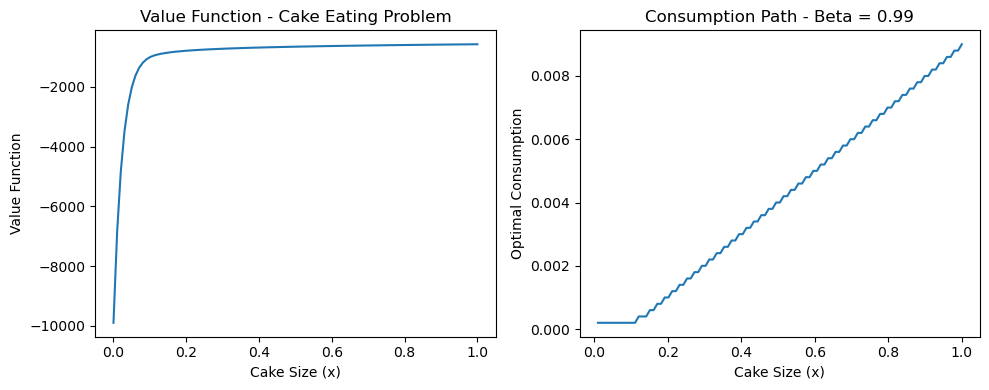

In [177]:
# plot value function and consumption path
fig, axs = plt.subplots(1,2, figsize=(10,4))

axs[0].plot(x, v_star, label='Value Function')
axs[0].set_xlabel('Cake Size (x)')
axs[0].set_ylabel('Value Function')
axs[0].set_title('Value Function - Cake Eating Problem')

# plot the consumption path
# to avoid the spike at 0 
x_right = x[1:]
c_star_right = c_star[1:]
axs[1].plot(x_right, c_star_right, label='Consumption Path')
axs[1].set_xlabel('Cake Size (x)')
axs[1].set_ylabel('Optimal Consumption')
axs[1].set_title('Consumption Path - Beta = 0.99')

plt.tight_layout()
plt.show()


In [178]:
# find value function and policy function when beta = 0.9
v_star1, c_star1 = VFI(v_0, beta=0.9)

# find value function and policy function when beta = 0.9999
v_star2, c_star2 = VFI(v_0, beta=0.9999)

/var/folders/ks/h0pz3qvs08x4f3vq_tk59sj00000gn/T/ipykernel_174/3378504012.py:3: RuntimeWarning: divide by zero encountered in log
  return np.log(c)


Converged after 147 iterations
Converged after 1463 iterations


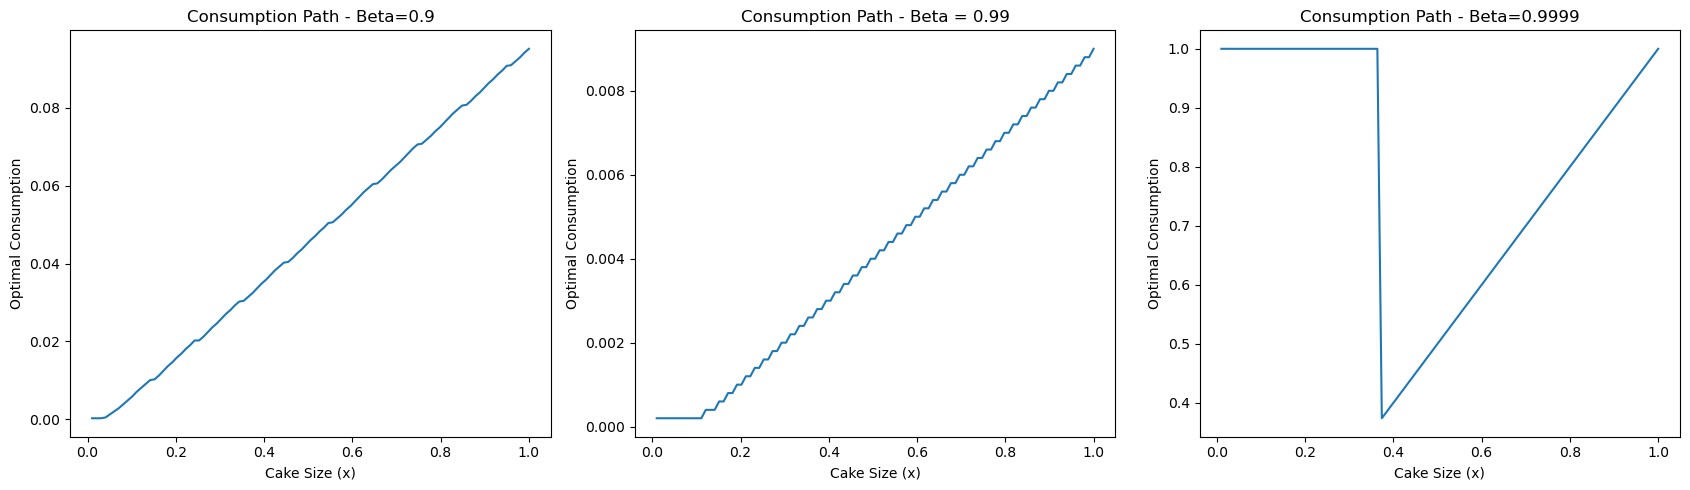

In [179]:
fig, axs = plt.subplots(1,3, figsize=(17,5))
# plot the consumption path for beta = 0.9
# to avoid the spike at 0 
x_right = x[1:]
c_star_right1 = c_star1[1:]
axs[0].plot(x_right, c_star_right1, label='Consumption Path')
axs[0].set_xlabel('Cake Size (x)')
axs[0].set_ylabel('Optimal Consumption')
axs[0].set_title('Consumption Path - Beta=0.9')

# plot the consumption path for beta = 0.99
# to avoid the spike at 0 
c_star_right = c_star[1:]
axs[1].plot(x_right, c_star_right, label='Consumption Path')
axs[1].set_xlabel('Cake Size (x)')
axs[1].set_ylabel('Optimal Consumption')
axs[1].set_title('Consumption Path - Beta = 0.99')

# plot the consumption path for beta = 0.9999
# to avoid the spike at 0 
c_star_right2 = c_star2[1:]
axs[2].plot(x_right, c_star_right2, label='Consumption Path')
axs[2].set_xlabel('Cake Size (x)')
axs[2].set_ylabel('Optimal Consumption')
axs[2].set_title('Consumption Path - Beta=0.9999')

plt.tight_layout()
plt.show()

### Interpretation
I don't know how to explain the graph of $\beta = 0.9999$ but I can explain the first two. When $\beta$ increases, the household becomes more patient, i.e., future consumption is cheaper. So the household subtitute towards future consumption.

/var/folders/ks/h0pz3qvs08x4f3vq_tk59sj00000gn/T/ipykernel_174/3378504012.py:3: RuntimeWarning: divide by zero encountered in log
  return np.log(c)


Converged after 176 iterations


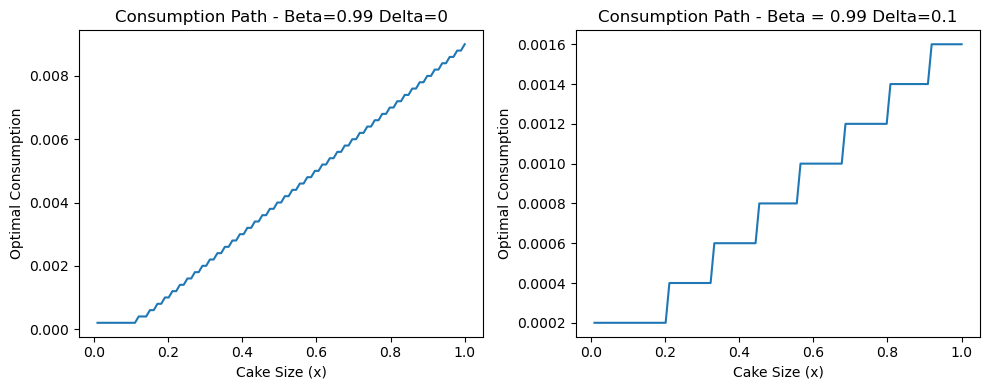

In [180]:
# find value function and policy function when delta = 0.1
v_star3, c_star3 = VFI(v_0, delta=0.1)

fig, axs = plt.subplots(1, 2, figsize=(10,4))
# plot the consumption path for beta = 0.99 delta = 0
# to avoid the spike at 0 
x_right = x[1:]
c_star_right = c_star[1:]
axs[0].plot(x_right, c_star_right, label='Consumption Path')
axs[0].set_xlabel('Cake Size (x)')
axs[0].set_ylabel('Optimal Consumption')
axs[0].set_title('Consumption Path - Beta=0.99 Delta=0')

# plot the consumption path for betsa = 0.99 delta = 0.1 
# to avoid the spike at 0 
c_star_right3 = c_star3[1:]
axs[1].plot(x_right, c_star_right3, label='Consumption Path')
axs[1].set_xlabel('Cake Size (x)')
axs[1].set_ylabel('Optimal Consumption')
axs[1].set_title('Consumption Path - Beta = 0.99 Delta=0.1')

plt.tight_layout()
plt.show()

### Interpretation 
When there depreciation rate increases, there is less to consume overall, so the household consumes less when $\delta=0.1$. We can also see there are more steps in the right graph but I don't know how to explain such difference.

### Answer to Problem 2
1. The state varibale is the size of the cake $x$
1. For $t<T$, the Bellman equation is 
\begin{align*}
v_t(x_t) = \max_{c_t} u(c_t) + \beta v(x_{t+1}) \\
\text{s.t. } c_t+x_{t+1}=(1-\delta)x_t
\end{align*}
1. The Bellman equation for $t=T$ is 
\begin{align*}
v_T(x_T) = \max_{c_T} u(c_T) \\
\text{s.t. } c_T=(1-\delta)x_T
\end{align*}
1. The rest of the problem is done by the following code

In [181]:
# set up parameters
beta = 0.99
delta= 0
xmin = 0
xmax = 1
grid_size = 100
T=50

In [182]:
# define cake grid and consumption candidates
x = np.linspace(xmin,xmax,grid_size)
c_candidates = np.linspace(0,1,5000)

# create a matrix for x' and c
x_prime_c = (1 - delta) * x[np.newaxis,:] - c_candidates[:,np.newaxis]

# guess initial value function
v_T = np.log(x)

/var/folders/ks/h0pz3qvs08x4f3vq_tk59sj00000gn/T/ipykernel_174/2745486567.py:9: RuntimeWarning: divide by zero encountered in log
  v_T = np.log(x)


In [183]:
# define utility function
def utility(c):
    return np.log(c)

In [184]:
# define backwards Bellman operator as a function
def bellman(v_later, beta, delta, c_candidates, x):
    
    # interpolate values of the value function for a given cake size
    f_interp = interp1d(x, v_later, kind='linear', bounds_error=False, fill_value=(-10000, 0))
    v_prime_candidates = f_interp(x_prime_c)
    
    # calculate utility for all possible consumption choices
    utility_values = utility(c_candidates[:,np.newaxis]) + beta * v_prime_candidates
    
    # optimize over consumption for given cake sizes and derive the new value function
    c_index = np.argmax(utility_values, axis=0)
    c = c_candidates[c_index]
    v_now = np.max(utility_values, axis=0)

    return v_now, c

In [185]:
# define backwards induction iteration 
def backwards(v_T, bellman=bellman, c_candidates=c_candidates, x=x, T=T, beta=beta, delta=delta):

    v_later = v_T

    for iter in range(T):
        # use the backwards Bellman operator to generate value function from next period to current period
        v_now, c= bellman(v_later, beta, delta, c_candidates, x)
        
        # replace the "later valuation" by the "now value function"
        v_later = v_now

    return v_later, c 

In [186]:
# derive the consumption path for T=50
v_star, c_star = backwards(v_T)

# derive the consumption path for T=500
v_star500, c_star500 = backwards(v_T, T=500)


/var/folders/ks/h0pz3qvs08x4f3vq_tk59sj00000gn/T/ipykernel_174/3378504012.py:3: RuntimeWarning: divide by zero encountered in log
  return np.log(c)


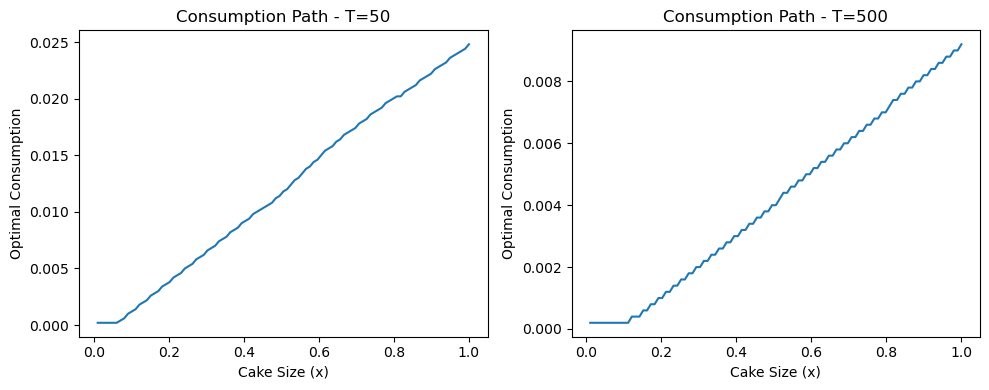

In [187]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))

# plot the consumption path for T=50
# to avoid the spike at 0 
x_right = x[1:]
c_star_right = c_star[1:]
axs[0].plot(x_right, c_star_right, label='Consumption Path')
axs[0].set_xlabel('Cake Size (x)')
axs[0].set_ylabel('Optimal Consumption')
axs[0].set_title('Consumption Path - T=50')


# plot the consumption path for T=500
# to avoid the spike at 0 
c_star500_right = c_star500[1:]
axs[1].plot(x_right, c_star500_right, label='Consumption Path')
axs[1].set_xlabel('Cake Size (x)')
axs[1].set_ylabel('Optimal Consumption')
axs[1].set_title('Consumption Path - T=500')

plt.tight_layout()
plt.show()

### Interpretation
When $T$ becomes larger, the consumption path approaches to the one in infinite-horizon case.

### Answer to Problem 3
1. The FOC for the consumption-saving problem is 
$$ u'(c) = \beta v'(a')$$
2. Using Envelope Theorem, we have
$$v'(a) =  (1+r) u'(c)$$
   Plugging into the FOC, we have the Euler equation as
$$ u'(c) = \beta (1+r) u'(c')$$
3. Compute the optimal consumption using FOC

In [188]:
# set parameters 
beta = 0.99
r = (1/beta) - 1
y = 1
amin = 0
amax = 1
grid_size = 100
max_iter = 2000
tolerance = 1e-5

In [189]:
# define asset grid
a = np.linspace(amin, amax, grid_size)

# guess initial policy function
c_0 = np.linspace(1, 3, grid_size)


Note: the following EGM is taught by Youngdoo

In [190]:
# define endogenous grid method operator
def EGM(c_old, beta, r, y, a, grid_size):

    c_tilde = np.empty(grid_size)
    a_tilde = np.empty(grid_size)

    # assume c_old is the consumption tomorrow, use the Euler Eq. to compute consumption, so this is not policy iteration, this is kind of iterating backwards
    for (aidx,ap) in enumerate(a):
        c_tilde[aidx] = (beta * (1+r) * c_old[aidx]**(-1))**(-1)
        a_tilde[aidx] = (c_tilde[aidx] + ap - y) / (1+r)

    # compute today's optimal choices
    c_interp = interp1d(a_tilde, c_tilde, kind='linear', bounds_error=False, fill_value='extrapolate')
    c_new = c_interp(a)

    return c_new

In [191]:
# define policy function iteration operator
def EGM_Iter(c_0, EGM=EGM, beta=beta, r=r, y=y, a=a, grid_size = grid_size, max_iter=max_iter, tolerance=tolerance, progress=True, prog_freq=50):

    c_old = c_0

    for iter in range(max_iter):
        c_new = EGM(c_old, beta, r, y, a, grid_size)

        diff = np.max(np.abs(c_new-c_old))

        if diff < tolerance:
            c_star = c_new
            print('Converged after ' + str(iter) + ' iterations')
            return c_star
        else: 
            c_old = c_new

    if iter == max_iter-1:
        print("No Convergence")


Converged after 247 iterations


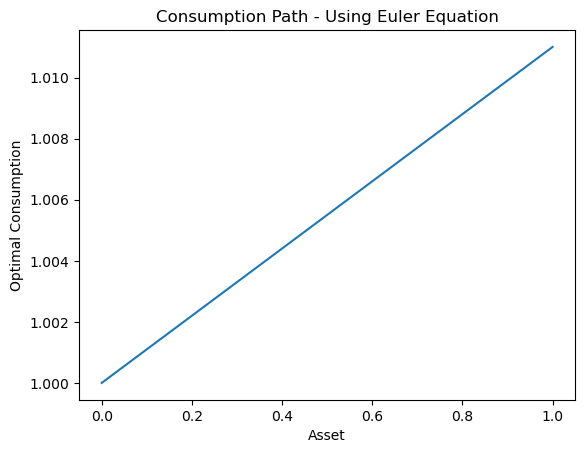

In [192]:
# solve for the policy function
c_star = EGM_Iter(c_0)

# plot the consumption path
plt.plot(a, c_star)
plt.xlabel('Asset')
plt.ylabel('Optimal Consumption')
plt.title('Consumption Path - Using Euler Equation')
plt.show()

### Interpretation
We can see the consumption path is smoother than in class and it takes less time/iterations to generate the results. This is because the EGM uses Euler equation more efficiently.